# Polynomial Linear Regression?

Polynomial Linear Regression is still **linear regression**, but you create **extra features** from your original feature by raising it to powers (`x²`, `x³`, etc.).  
The model becomes capable of learning **curved** relationships.

---

## Why Do We Need It?

Simple Linear Regression uses:

`y = mx + b`

This can only fit a **straight line**.  
But if your data looks curved — like a **U-shape**, **S-shape**, or **wave** — a straight line cannot fit it.

Polynomial features allow the model to **bend**.

---

## How Does It Work?

Let’s say your original feature is:

`x`

In polynomial regression (degree 2), we expand the features to:

`x, x^2`

Now the model becomes:

`y = b + m1*x + m2*x^2`

This is a **quadratic curve** — it can make **U-shapes** or **∩-shapes**.

Degree 3:

`y = b + m1*x + m2*x^2 + m3*x^3`

More degrees → more flexibility → more curves.

---

## Important Note

The model is called **linear** because it is **linear in parameters** (`m1`, `m2`, `m3`, …).  
It is **not linear in x**.


## Code

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures,StandardScaler 
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

import plotly.express as px
import plotly.graph_objects as go

In [121]:
# data generation:
n = 200

X = 6 * np.random.rand(200,1) - 3
noise = np.random.randn(200,1)

y = 0.8 * X**2 + 0.9 * X + 2 + noise

# y = 0.8x^2 + 0.9x + 2... these ceoff are to be prdicted.

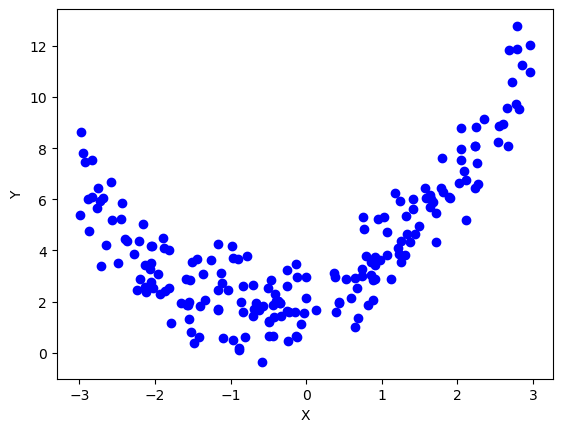

In [122]:
plt.plot(X,y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Created the data in this curvy shape to prove that polynomial linear regression will work better in this kind of data then simple/multiple linear regression.

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.3537652439169592

In [125]:
X_train.shape,y_pred.shape

((160, 1), (40, 1))

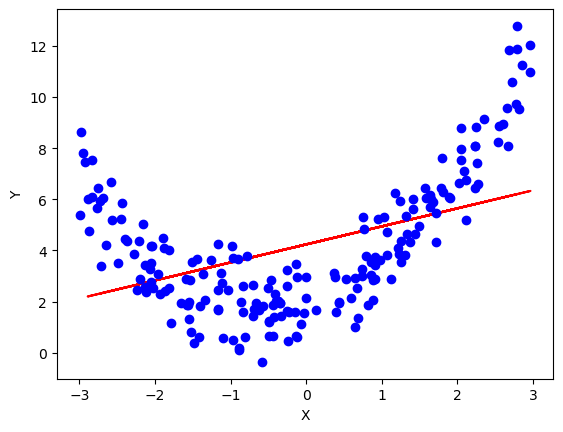

In [126]:
plt.plot(X_test,y_pred,color='red')
plt.plot(X,y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

linear regression line isn't doing very well ofcourse.. so lets now see plynomial linear regression

In [127]:
#step 1: applying polynomialfeature
poly = PolynomialFeatures(degree=2,include_bias=True) # for degree 2, you will get 3 columns for each column in X -->  X^0 | X^1 | X^2 if inluce_biase = True(default) otherwise X^0 is cluded
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [128]:
print(X_train[0],"\n",X_train_trans[0])

[-1.89139732] 
 [ 1.         -1.89139732  3.57738383]


In [129]:
# now with these updated X columns, its time to chech the accuracy again
lr = LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred1 = lr.predict(X_test_trans)
r2_score(y_test,y_pred1)

0.8549333799283603

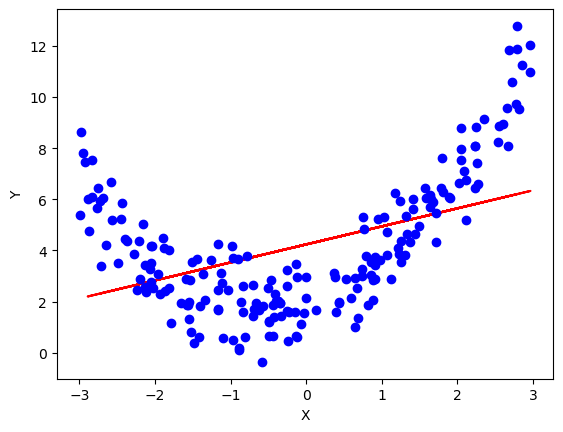

In [130]:
plt.plot(X_test,y_pred,color='red')
plt.plot(X,y,'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [131]:
print(lr.coef_,lr.intercept_)# almost near the coefficent we wanted: 0.9-->0.899, 0.8-->0.807, 2-->1.88

[[0.         0.86474575 0.80405464]] [2.02720509]


In [132]:
X_smooth = np.linspace(X.min(),X.max(),200).reshape(200,1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = lr.predict(X_smooth_poly)

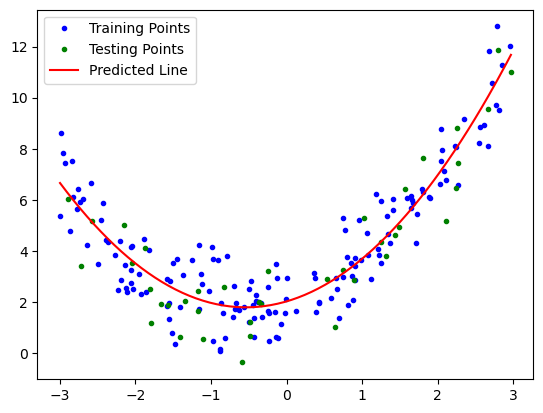

In [133]:
plt.plot(X_train,y_train,'b.',label='Training Points')
plt.plot(X_test,y_test,'g.',label='Testing Points')
plt.plot(X_smooth,y_smooth,'r-',label='Predicted Line')
plt.legend()
plt.show()

In [134]:
def polynomila_regression(degree):
    X_smooth = np.linspace(X.min(),X.max(),len(X)).reshape(-1,1)
    poly = PolynomialFeatures(degree = degree,include_bias=False)
    std_scaler = StandardScaler()
    lr = LinearRegression()
    poly_reg = Pipeline([
        ('polynomial_features',poly),
        ('standar_scaler',std_scaler),
        ('linear_regression',lr)
    ])
    poly_reg.fit(X,y)
    y_smooth = poly_reg.predict(X_smooth)
    plt.plot(X_train,y_train,'b.',label='Training Points')
    plt.plot(X_test,y_test,'g.',label='Testing Points')
    plt.plot(X_smooth,y_smooth,'r',label=f'Degree {degree}')
    plt.legend()
    plt.show()
    

 Having more degree creates more curvy model... meaning it tries to reach every data point which results in overfitting.. and if its just left very small to the point where it doesn't even the minimum, it gets underfitted... thats why its called **hyperparameter**

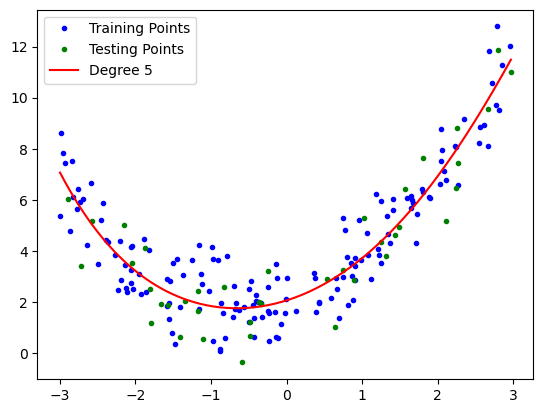

In [135]:
polynomila_regression(5)

Now upto this point was for the data which had only one input column. meaning just 2d data meaning it was just **Simple plynomial Linear Regression**. Let's move on now

In [136]:
# 3D polynomial linear regression
# data generation
X = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = X**2 + y**2 + 0.2*X + 0.2*y + 0.1*X*y + 2 + np.random.randn(100,1)
#z = ^2 + y^2 + 0.2X + 0.2y + 0.1xy +  2 + noise

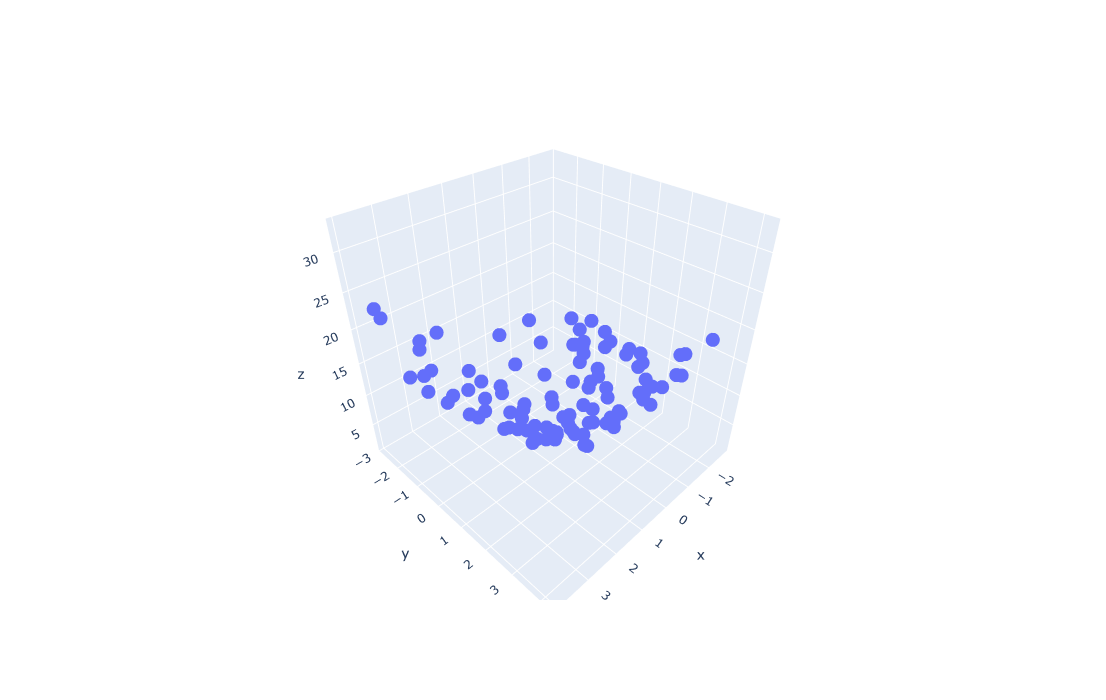

In [137]:
fig = px.scatter_3d(x=X.ravel(),y=y.ravel(),z=z.ravel())
fig.update_layout(height=700,width=900,margin=dict(l=100,r=100,b=100,t=100),scene_aspectmode='cube')
fig.show()


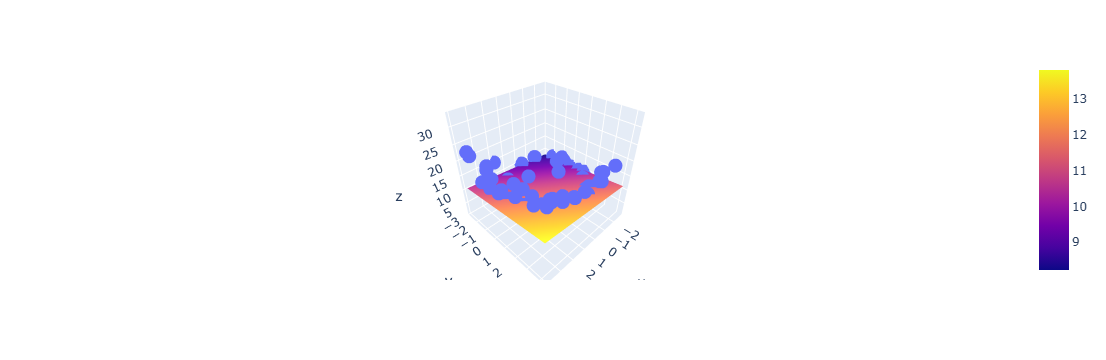

In [153]:
lr = LinearRegression()
lr.fit(np.array([X,y]).reshape(100,2),z)
x_input = np.linspace(X.min(),X.max(),50)
y_input = np.linspace(y.min(),y.max(),50)

xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel(),yGrid.ravel())).T

z_final = lr.predict((final)).reshape(xGrid.shape)


fig = px.scatter_3d(x=X.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=xGrid,y=yGrid,z=z_final))
fig.update_layout(scene_aspectmode='cube')
fig.show()

In [154]:
x_multi = np.array([X,y]).reshape(100,2)
print(X.shape,y.shape,x_multi.shape)

(100, 1) (100, 1) (100, 2)


In [169]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(x_multi)

print("input", poly.n_features_in_)
print('output',poly.n_output_features_)
print('Power',poly.powers_)

input 2
output 10
Power [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [170]:
X_multi_trans.shape

(100, 10)

In [171]:
lr =  LinearRegression()
lr.fit(X_multi_trans,z)
X_test_multi = poly.transform(final)
z_final = lr.predict(X_test_multi)
# z_final.reshape(10,10)


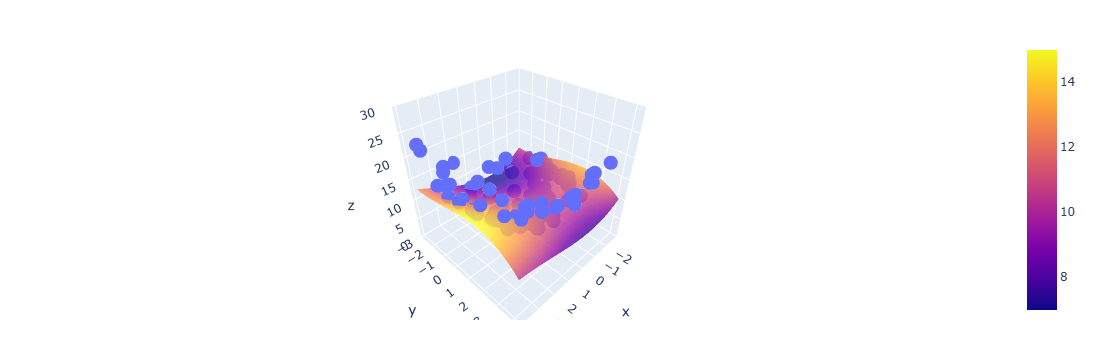

In [172]:
x_grid, y_grid = np.meshgrid(x_input, y_input)
z_grid = z_final.reshape(x_grid.shape)
fig = px.scatter_3d(
    x=X.ravel(),
    y=y.ravel(),
    z=z.ravel()
)

fig.add_trace(
    go.Surface(
        x=x_grid,
        y=y_grid,
        z=z_grid,
        opacity=0.8, 
    )
)

fig.update_layout(
    scene_aspectmode='cube',  
    scene=dict(zaxis=dict(range=[0,30])),
    margin=dict(l=40,r=40,b=40,t=40),
    # height=700
    
)

fig.show()



In [114]:
print(x_input.shape)
print(y_input.shape)
print(z_final.shape)
print(z_final.min(), z_final.max())


(10,)
(10,)
(100, 1)
-25.906879961087306 197.90782907282073
